In [3]:
import numpy as np

    

1.925604328159877


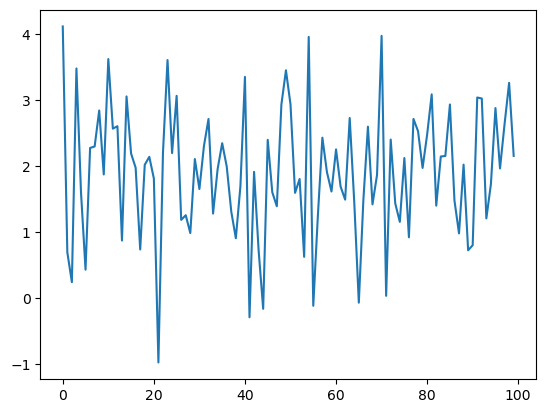

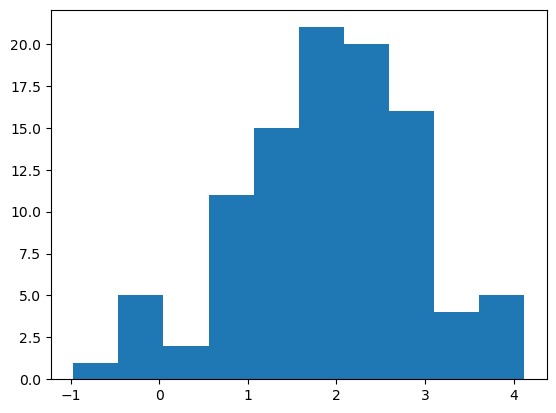

0.16


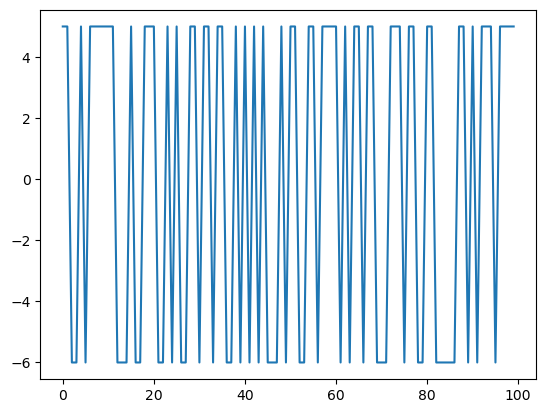

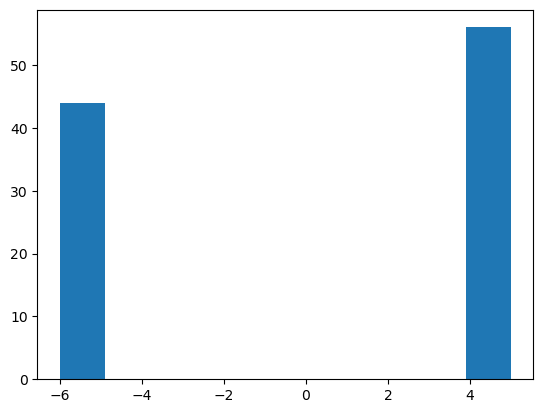

1.91


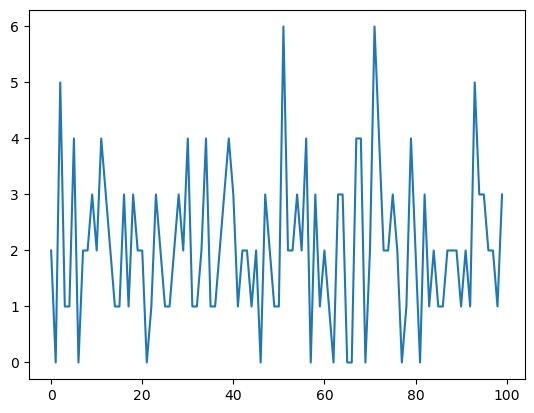

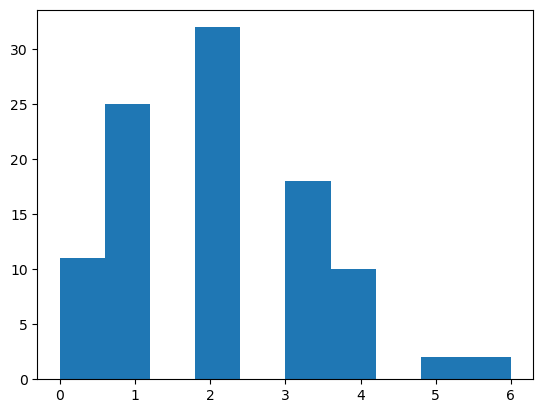

2.8072551872420535


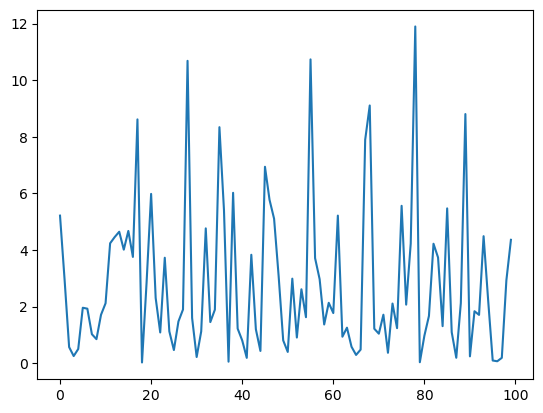

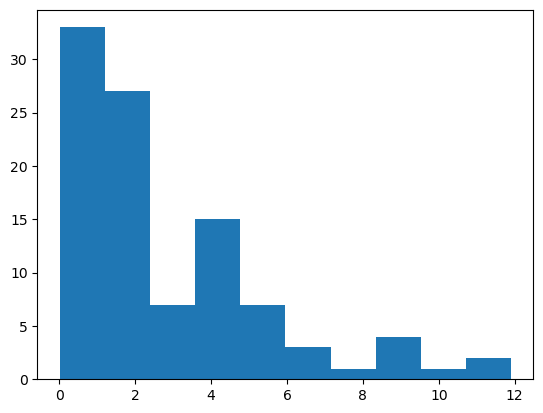

1.6589934714338668


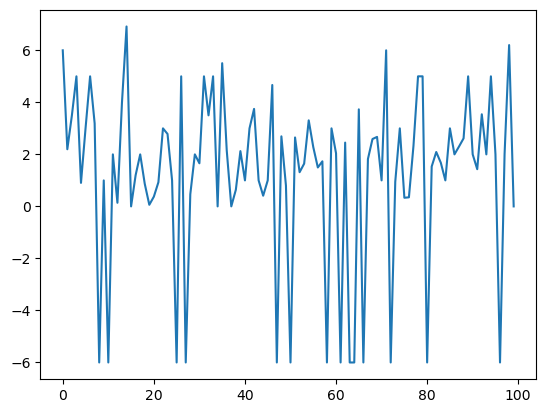

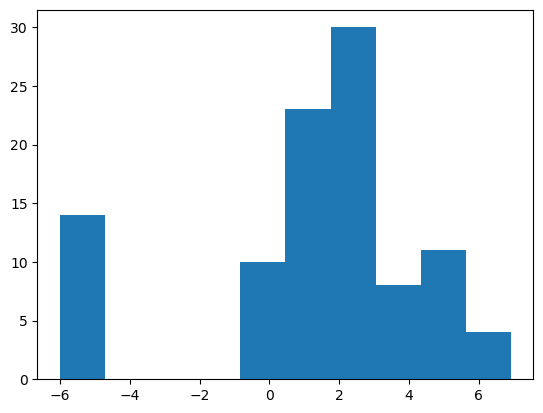

5


In [22]:
#class MAB:
#def distributions(sel
#define the options put forward to the agent
import matplotlib.pyplot as plt
#epsilon=float(input('choose your greed'))
x=[]
y=[]
distributions=[{'type':1,'mean':2,'var':1},{'type':2,'win':+5,'loss':-6},{'type':3,'mean':2},{'type':4,'mean':3},{'type':5}]
n_arms=5
expected_avg=[0.0]*5
pulled_counts=[0]*5
eps_decay=(epsilon-0.001)/100
def pull(arm):
    dist=distributions[arm]
    if dist['type']==1:
        reward=np.random.normal(dist['mean'],dist['var'])#if size not specied returns one value from array
    elif dist['type']==2:
        reward=np.random.choice([5,-6],p=[0.5,0.5])
    elif dist['type']==3:
        reward=np.random.poisson(dist['mean'])
    elif dist['type']==4:
        reward=np.random.exponential(dist['mean'])
    else:
        arm=np.random.choice(5)
        reward=pull(arm)
    #pulled_counts[arm]=pulled_counts[arm]+1
    #expected_avg[arm]=(expected_avg[arm]*(pulled_counts[arm]-1)+reward)/pulled_counts[arm]
    return reward
#first 5 episodes just explore all buttons
rewards=[]
for i in range(0,5):
    sum_of_button=0
    x=[]
    y=[]
    for j in range(100):
        sum_of_button+=pull(i)
        x.append(j)
        y.append(pull(i))
    print(sum_of_button/100)
    plt.plot(x,y)
    plt.show()
    plt.hist(y)
    plt.show()
    rewards.append(sum_of_button)
    expected_avg[i]=sum_of_button/100
    pulled_counts[i]=100

    
  
import matplotlib.pyplot as plt
#keep=[x[0],x[100],x[200],x[500],x[800],x[900]]
#keep_y=[y[0],y[100],y[200],y[500],y[800],y[900]]
#plt.plot(x,y)
#plt.show()
print(len(rewards))

        

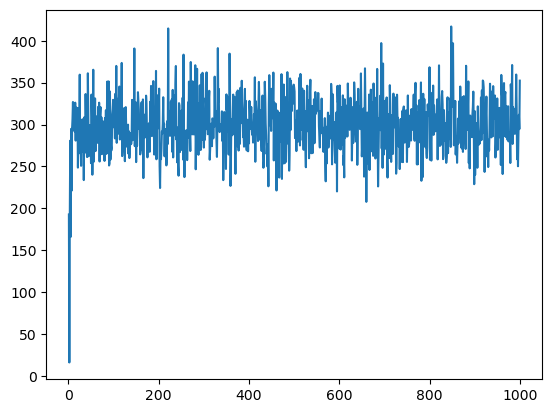

In [23]:
#next 100-5 episodes exploit the best mean wala
for episode in range(995):
    reward_per_ep=0
    for i in range(100):
        arm=np.argmax(expected_avg)
        q=pull(arm)
        reward_per_ep+=q
        pulled_counts[arm]=pulled_counts[arm]+1
        expected_avg[arm]=(expected_avg[arm]*(pulled_counts[arm]-1)+q/pulled_counts[arm])
    rewards.append(reward_per_ep)
episodes=np.arange(1,1001)
plt.plot(episodes,rewards)
        
        
    